In [112]:
from pandas_datareader import wb
import pandas as pd
import matplotlib.pyplot as plt 

import datetime
ind = ['SP.POP.TOTL']
df = wb.download(indicator=ind, country='SWZ', start=1960, end=2021)
df

SP.POP.TOTL
country  year             
Eswatini 2021      1172369
         2020      1160164
         2019      1148133
         2018      1136274
         2017      1124808
...                    ...
         1964       365120
         1963       357279
         1962       350155
         1961       343346
         1960       336578

[62 rows x 1 columns]

In [113]:
df = df.reset_index()
df

,country,year,SP.POP.TOTL
0,Eswatini,2021,1172369
1,Eswatini,2020,1160164
2,Eswatini,2019,1148133
3,Eswatini,2018,1136274
4,Eswatini,2017,1124808
...,...,...,...
57,Eswatini,1964,365120
58,Eswatini,1963,357279
59,Eswatini,1962,350155
60,Eswatini,1961,343346


In [115]:
df = df.drop('country', axis=1)
df

,year,SP.POP.TOTL
0,2021,1172369
1,2020,1160164
2,2019,1148133
3,2018,1136274
4,2017,1124808
...,...,...
57,1964,365120
58,1963,357279
59,1962,350155
60,1961,343346


In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   year         62 non-null     object
 1   SP.POP.TOTL  62 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB


In [117]:
df['year'] = pd.to_numeric(df['year'], errors="coerce").fillna(0).astype('int64')

In [118]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62 entries, 0 to 61
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   year         62 non-null     int64
 1   SP.POP.TOTL  62 non-null     int64
dtypes: int64(2)
memory usage: 1.1 KB


In [119]:
df = df.sort_values(['year'])
df

,year,SP.POP.TOTL
61,1960,336578
60,1961,343346
59,1962,350155
58,1963,357279
57,1964,365120
...,...,...
4,2017,1124808
3,2018,1136274
2,2019,1148133
1,2020,1160164


<AxesSubplot:xlabel='year', ylabel='SP.POP.TOTL'>

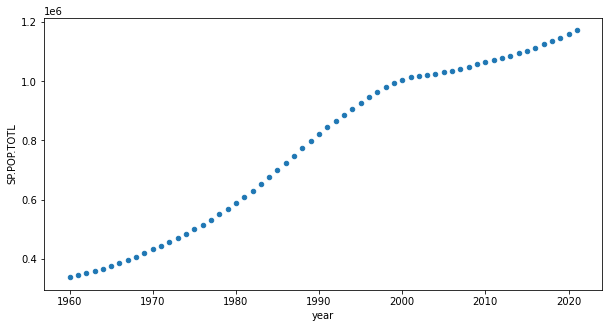

In [120]:
df.plot.scatter(x = 'year', y = 'SP.POP.TOTL', figsize=(10,5))

In [123]:
import numpy as np
from sklearn.linear_model import LinearRegression
import warnings
warnings.filterwarnings("ignore")

In [124]:
x = df.iloc[:, 0].values.reshape(-1, 1)
y = df.iloc[:, 1].values.reshape(-1, 1)
model = LinearRegression().fit(x, y)
y_pred = model.predict([[2076]])
y_pred

array([[2091583.03029387]])

Estimation of Eswatini Population in 2076 is 2,091,583